## 02 Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [2]:
df = pd.read_csv('../data/final_work_data.csv')

In [3]:
pd.set_option('display.max_columns', 35)

In [5]:
df.shape

(3015, 28)

In [6]:
df.head(2)

,state,county_name,unemployment_rate_2010,population_total_2010,urban_population_prc,rural_population_prc,crime_per_capita,per_capita_sme_num,per_capita_large_num,avg_ann_pay_per_emp_sme,avg_ann_pay_per_emp_large,avg_ann_pay_per_emp_total,population_jail_prc,2008_dem_%_vote,2008_rep_%_vote,2008_other_%_vote,smoke_percent_2010,popul_hs_grad_prc,popul_college_grad_prc,popul_single_paren_prc,liquor_stores_per10k,police_per_1000,WhiteNonHispanicPct2010,BlackNonHispanicPct2010,AsianNonHispanicPct2010,NativeAmericanNonHispanicPct2010,HispanicPct2010,MultipleRacePct2010
0,AL,Autauga,8.8,54571.0,0.579978,0.420022,0.002620,0.012259,0.002565,22667.03037,31792.20223,26856.69322,0.002914,0.257730,0.736136,0.006133,0.2577,0.72,0.21,0.09,0.4,1.172784,77.25,17.58,0.86,0.40,2.40,1.59
1,AL,Baldwin,9.9,182265.0,0.577209,0.422791,0.002112,0.020108,0.002019,28664.84962,29390.96748,28943.22956,0.004030,0.238119,0.752595,0.009286,0.2297,0.67,0.26,0.09,0.8,1.486846,83.50,9.31,0.74,0.63,4.38,1.49


In [7]:
df['unemployment_rate_2010'].mean()/100

0.09347486523767695

In [8]:
df['population_total_2010'].sum()

288702219.00115895

In [9]:
un_ppl = df['population_total_2010'].sum() * (df['unemployment_rate_2010'].mean()/100)
un_ppl = 288_702_219 * 0.0935
un_ppl

26993657.4765

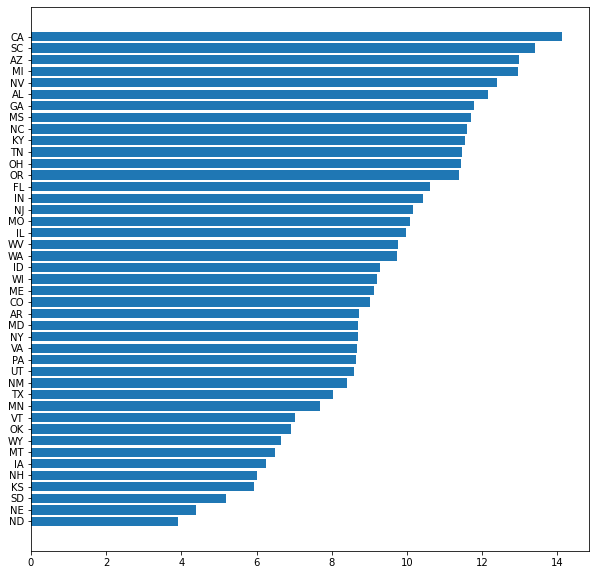

In [10]:
cols = list(df.groupby('state').mean('unemployment_rate_2010').sort_values('unemployment_rate_2010', ascending=True).index)

wid = df.groupby('state').mean('unemployment_rate_2010').sort_values('unemployment_rate_2010', ascending=True)['unemployment_rate_2010']

plt.figure(figsize=(10, 10))
plt.barh(cols, width=wid);

In [11]:
# crime per capita in counties with unemployment higher then average
df[df['unemployment_rate_2010'] > df['unemployment_rate_2010'].mean()]['crime_per_capita'].mean() * 100

0.8569036701058781

In [12]:
# crime per capita in counties with unemployment lower then average
df[df['unemployment_rate_2010'] < df['unemployment_rate_2010'].mean()]['crime_per_capita'].mean() * 100

3.0719489644690827

In [13]:
# liquor stores per 10_000 people in counties with unemployment higher then average
df[df['unemployment_rate_2010'] > df['unemployment_rate_2010'].mean()]['liquor_stores_per10k'].mean()

0.8986938707597584

In [14]:
# liquor stores per 10_000 people in counties with unemployment lower then average
df[df['unemployment_rate_2010'] < df['unemployment_rate_2010'].mean()]['liquor_stores_per10k'].mean()

1.279910141206676

In [15]:
# what is the average unemployment rate for areas with rural % over 50%?
print('Mean unemployment % where over 50% of the population is rural: ',
      df[df['rural_population_prc'] >= 0.5]['unemployment_rate_2010'].mean())

Mean unemployment % where over 50% of the population is rural:  9.44698629172208


In [16]:
# what about over 75%?
print('Mean unemployment % where over 75% of the population is rural: ',
      df[df['rural_population_prc'] >= 0.75]['unemployment_rate_2010'].mean())

Mean unemployment % where over 75% of the population is rural:  9.223039098194901


In [17]:
# what about over 95%?
print('Mean unemployment % where over 95% of the population is rural: ',
      df[df['rural_population_prc'] >= 0.95]['unemployment_rate_2010'].mean())


Mean unemployment % where over 95% of the population is rural:  8.482219061166429


In [18]:
# How about for areas with urban % over 50%?
print('Mean unemployment % where over 50% of the population is urban: ',
      df[df['urban_population_prc'] >= 0.5]['unemployment_rate_2010'].mean())

Mean unemployment % where over 50% of the population is urban:  9.199101131197207


In [19]:
# How about for areas with urban % over 75%?
print('Mean unemployment % where over 75% of the population is urban: ',
      df[df['urban_population_prc'] >= 0.75]['unemployment_rate_2010'].mean())

Mean unemployment % where over 75% of the population is urban:  9.134173076923073


In [20]:
# How about for over 95% urban?
print('Mean unemployment % where over 95% of the population is urban: ',
      df[df['urban_population_prc'] >= 0.95]['unemployment_rate_2010'].mean())

Mean unemployment % where over 95% of the population is urban:  9.549659863945582


In [21]:
# what is the average unemployment rate for areas with more democratic voters?
print('Mean unemployment % in counties where over 50% of the population voted Democrat in 2008: ',
      df[df['2008_dem_%_vote'] >= 0.5]['unemployment_rate_2010'].mean())

Mean unemployment % in counties where over 50% of the population voted Democrat in 2008:  9.94825485683941


In [22]:
print('Mean unemployment % in counties where over 60% of the population voted Democrat in 2008: ',
      df[df['2008_dem_%_vote'] >= 0.6]['unemployment_rate_2010'].mean())

Mean unemployment % in counties where over 60% of the population voted Democrat in 2008:  10.513018914271676


In [23]:
print('Mean unemployment % in counties where over 80% of the population voted Democrat in 2008: ',
      df[df['2008_dem_%_vote'] >= 0.8]['unemployment_rate_2010'].mean())

Mean unemployment % in counties where over 80% of the population voted Democrat in 2008:  12.928248587570625


In [24]:
# what is the average unemployment rate for areas with more republican voters?
print('Mean unemployment % in counties where over 50% of the population voted Republican in 2008: ',
      df[df['2008_rep_%_vote'] >= 0.5]['unemployment_rate_2010'].mean())

Mean unemployment % in counties where over 50% of the population voted Republican in 2008:  9.115292367117497


In [25]:
print('Mean unemployment % in counties where over 60% of the population voted Republican in 2008: ',
      df[df['2008_rep_%_vote'] >= 0.6]['unemployment_rate_2010'].mean())

Mean unemployment % in counties where over 60% of the population voted Republican in 2008:  8.564463863639952


In [26]:
print('Mean unemployment % in counties where over 80% of the population voted Republican in 2008: ',
      df[df['2008_rep_%_vote'] >= 0.8]['unemployment_rate_2010'].mean())

Mean unemployment % in counties where over 80% of the population voted Republican in 2008:  6.522330097087378


In [27]:
# what is the average unemployment rate for areas with rural % over 50%?
print('Mean unemployment % where over 50% of the population is rural: ',
      df[df['rural_population_prc'] >= 0.5]['unemployment_rate_2010'].mean())

# what about over 75%?
print('Mean unemployment % where over 75% of the population is rural: ',
      df[df['rural_population_prc'] >= 0.75]['unemployment_rate_2010'].mean())

# what about over 95%?
print('Mean unemployment % where over 95% of the population is rural: ',
      df[df['rural_population_prc'] >= 0.95]['unemployment_rate_2010'].mean())

print('\n')

# How about for areas with urban % over 50%?
print('Mean unemployment % where over 50% of the population is urban: ',
      df[df['urban_population_prc'] >= 0.5]['unemployment_rate_2010'].mean())

# How about for areas with urban % over 75%?
print('Mean unemployment % where over 75% of the population is urban: ',
      df[df['urban_population_prc'] >= 0.75]['unemployment_rate_2010'].mean())

# How about for over 95% urban?
print('Mean unemployment % where over 95% of the population is urban: ',
      df[df['urban_population_prc'] >= 0.95]['unemployment_rate_2010'].mean())

Mean unemployment % where over 50% of the population is rural:  9.44698629172208
Mean unemployment % where over 75% of the population is rural:  9.223039098194901
Mean unemployment % where over 95% of the population is rural:  8.482219061166429


Mean unemployment % where over 50% of the population is urban:  9.199101131197207
Mean unemployment % where over 75% of the population is urban:  9.134173076923073
Mean unemployment % where over 95% of the population is urban:  9.549659863945582


In [28]:
# what is the average unemployment rate for areas with more democratic voters?
print('Mean unemployment % in counties where over 50% of the population voted Democrat in 2008: ',
      df[df['2008_dem_%_vote'] >= 0.5]['unemployment_rate_2010'].mean())
print('Mean unemployment % in counties where over 60% of the population voted Democrat in 2008: ',
      df[df['2008_dem_%_vote'] >= 0.6]['unemployment_rate_2010'].mean())
print('Mean unemployment % in counties where over 80% of the population voted Democrat in 2008: ',
      df[df['2008_dem_%_vote'] >= 0.8]['unemployment_rate_2010'].mean())

print('\n')

# what is the average unemployment rate for areas with more republican voters?
print('Mean unemployment % in counties where over 50% of the population voted Republican in 2008: ',
      df[df['2008_rep_%_vote'] >= 0.5]['unemployment_rate_2010'].mean())
print('Mean unemployment % in counties where over 60% of the population voted Republican in 2008: ',
      df[df['2008_rep_%_vote'] >= 0.6]['unemployment_rate_2010'].mean())
print('Mean unemployment % in counties where over 80% of the population voted Republican in 2008: ',
      df[df['2008_rep_%_vote'] >= 0.8]['unemployment_rate_2010'].mean())

Mean unemployment % in counties where over 50% of the population voted Democrat in 2008:  9.94825485683941
Mean unemployment % in counties where over 60% of the population voted Democrat in 2008:  10.513018914271676
Mean unemployment % in counties where over 80% of the population voted Democrat in 2008:  12.928248587570625


Mean unemployment % in counties where over 50% of the population voted Republican in 2008:  9.115292367117497
Mean unemployment % in counties where over 60% of the population voted Republican in 2008:  8.564463863639952
Mean unemployment % in counties where over 80% of the population voted Republican in 2008:  6.522330097087378


In [29]:
# For counties with unemployment rates under 5%, what commonalities do they have? vs counties with unemployment rates over 15%

print(df[df['unemployment_rate_2010'] <= 5].drop(labels= ['state', 'county_name'], axis= 1).mean())
print(df[df['unemployment_rate_2010'] >= 15].drop(labels= ['state', 'county_name'], axis= 1).mean())

unemployment_rate_2010                  4.081877
population_total_2010               14621.473174
urban_population_prc                    0.246239
rural_population_prc                    0.782412
crime_per_capita                        0.013162
per_capita_sme_num                      0.029108
per_capita_large_num                    0.001856
avg_ann_pay_per_emp_sme             28248.190134
avg_ann_pay_per_emp_large           36746.821805
avg_ann_pay_per_emp_total           29890.739940
population_jail_prc                     0.002126
2008_dem_%_vote                         0.319051
2008_rep_%_vote                         0.659159
2008_other_%_vote                       0.021790
smoke_percent_2010                      0.217996
popul_hs_grad_prc                       0.878015
popul_college_grad_prc                  0.184239
popul_single_paren_prc                  0.058333
liquor_stores_per10k                    1.805435
police_per_1000                         2.044770
WhiteNonHispanicPct2

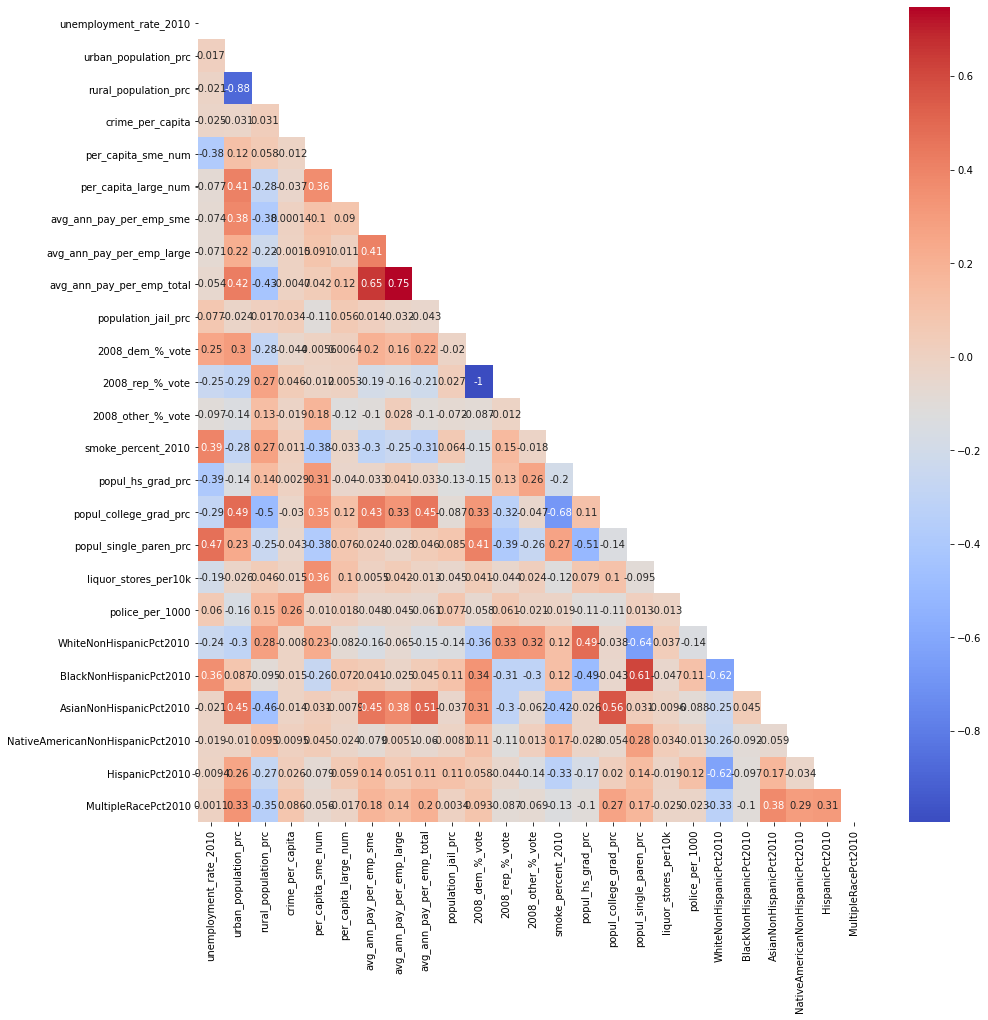

In [6]:
# The Correlation Chart
plt.figure(figsize=(15,15))
corr = df.drop(columns='population_total_2010').corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.drop(columns='population_total_2010').corr(), mask = mask, annot=True, cmap='coolwarm');

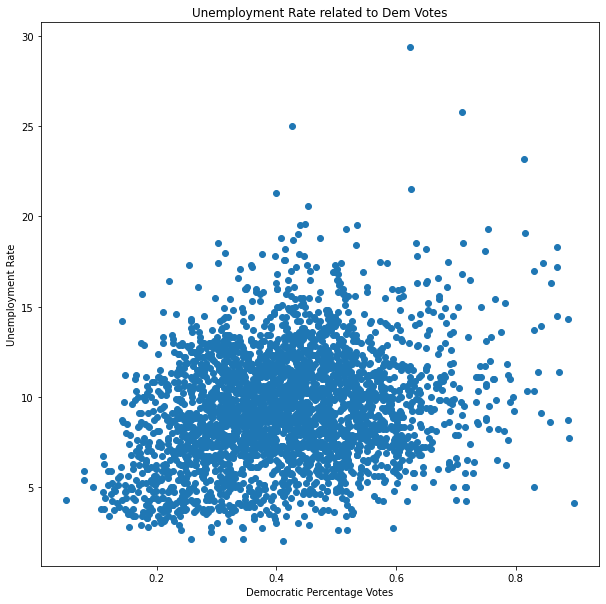

In [31]:
# What is the relationship between democratic votes to unemployment rate?
plt.figure(figsize = (10,10))
plt.scatter(df['2008_dem_%_vote'], df['unemployment_rate_2010'])
plt.title('Unemployment Rate related to Dem Votes')
plt.ylabel('Unemployment Rate')
plt.xlabel('Democratic Percentage Votes');

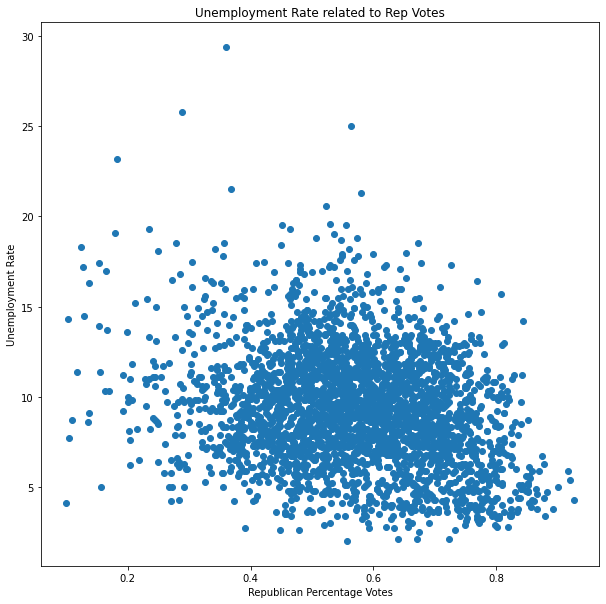

In [32]:
# What is the relationship between Republic votes to unemployment rate?
plt.figure(figsize = (10,10))
plt.scatter(df['2008_rep_%_vote'], df['unemployment_rate_2010'])
plt.title('Unemployment Rate related to Rep Votes')
plt.ylabel('Unemployment Rate')
plt.xlabel('Republican Percentage Votes');

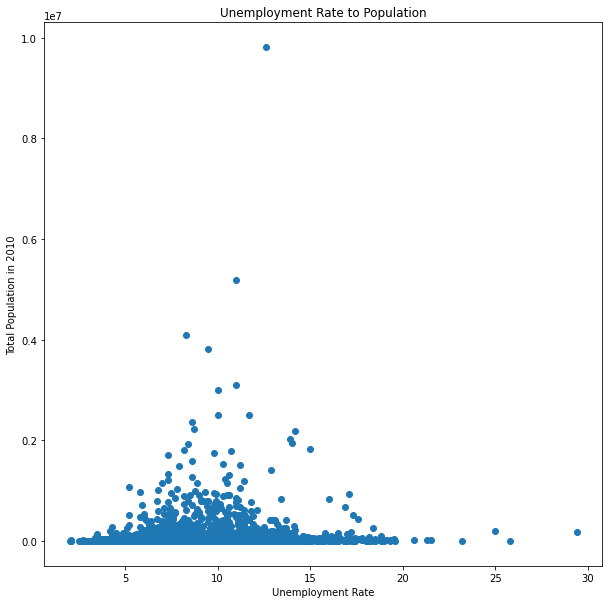

In [33]:
# How would the total poulation of a county affect unemployment rate?
plt.figure(figsize = (10, 10))
plt.scatter(df['unemployment_rate_2010'], df['population_total_2010'])
plt.title('Unemployment Rate to Population')
plt.xlabel('Unemployment Rate')
plt.ylabel('Total Population in 2010');

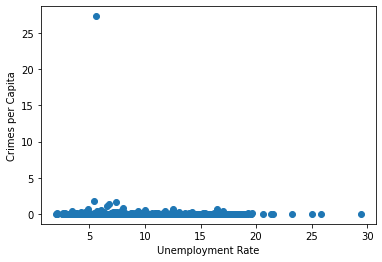

In [34]:
# What is the relationship between crimes per capita and unemployment rate?
plt.scatter(df['unemployment_rate_2010'], df['crime_per_capita'])
plt.xlabel('Unemployment Rate')
plt.ylabel('Crimes per Capita');

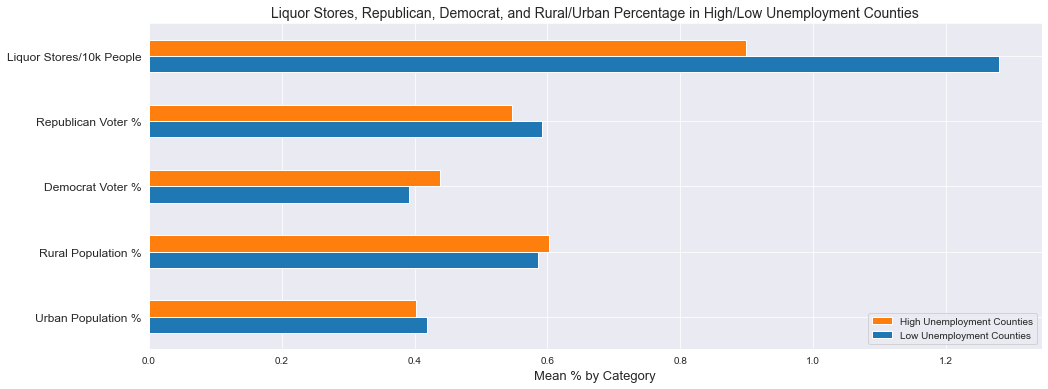

In [35]:
# Liquor Stores, Republican Voting, Democrat Voting, and Rural/Urban Percentage in High/Low Unemployment Counties
sns.set_style('darkgrid')

low_u = df[df['unemployment_rate_2010'] < df['unemployment_rate_2010'].mean()][['urban_population_prc', 'rural_population_prc', 
                                                                                '2008_dem_%_vote','2008_rep_%_vote', 
                                                                                'liquor_stores_per10k']].mean()

high_u = df[df['unemployment_rate_2010'] > df['unemployment_rate_2010'].mean()][['urban_population_prc', 'rural_population_prc', 
                                                                                '2008_dem_%_vote','2008_rep_%_vote', 
                                                                                'liquor_stores_per10k']].mean()

df_hl_1 = pd.concat([low_u, high_u], axis= 1)
df_hl_1.rename(columns= {0:'Low Unemployment Counties', 1: 'High Unemployment Counties'}, inplace= True)
df_hl_1.rename(index= {'urban_population_prc': 'Urban Population %', 'rural_population_prc': 'Rural Population %', 
                       '2008_dem_%_vote': 'Democrat Voter %', '2008_rep_%_vote': 'Republican Voter %',
                      'liquor_stores_per10k': 'Liquor Stores/10k People'}, inplace= True)

df_hl_1.plot(kind= 'barh', figsize= (16, 6), legend= 'reverse')

plt.title('Liquor Stores, Republican, Democrat, and Rural/Urban Percentage in High/Low Unemployment Counties', fontsize = 14)
plt.yticks(fontsize= 12)
plt.xlabel('Mean % by Category', fontsize = 13);

plt.savefig('../graphs/high_low1.png')

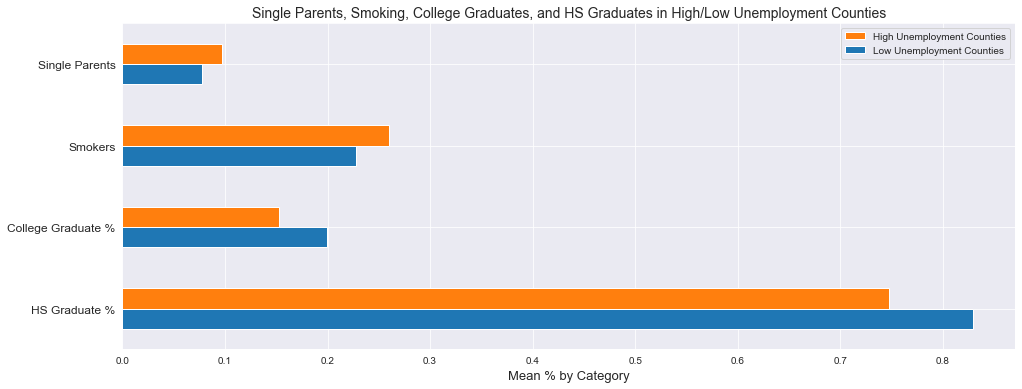

In [36]:
# Single parents, Smoking, College Graduates, and HS Graduates in High/Low Unemployment Counties

low_u = df[df['unemployment_rate_2010'] < df['unemployment_rate_2010'].mean()][['popul_hs_grad_prc', 'popul_college_grad_prc', 
                                                                                'smoke_percent_2010', 'popul_single_paren_prc']].mean()

high_u = df[df['unemployment_rate_2010'] > df['unemployment_rate_2010'].mean()][['popul_hs_grad_prc', 'popul_college_grad_prc', 
                                                                                'smoke_percent_2010', 'popul_single_paren_prc']].mean()

df_hl_2 = pd.concat([low_u, high_u], axis= 1)
df_hl_2.rename(columns= {0:'Low Unemployment Counties', 1: 'High Unemployment Counties'}, inplace= True)
df_hl_2.rename(index= {'popul_hs_grad_prc': 'HS Graduate %', 'popul_college_grad_prc': 'College Graduate %',
                       'smoke_percent_2010': 'Smokers', 
                       'popul_single_paren_prc': 'Single Parents'}, inplace= True)

df_hl_2.plot(kind= 'barh', figsize= (16, 6), legend= 'reverse')

plt.title('Single Parents, Smoking, College Graduates, and HS Graduates in High/Low Unemployment Counties', fontsize = 14)
plt.yticks(fontsize= 12)
plt.xlabel('Mean % by Category', fontsize = 13);

plt.savefig('../graphs/high_low2.png')

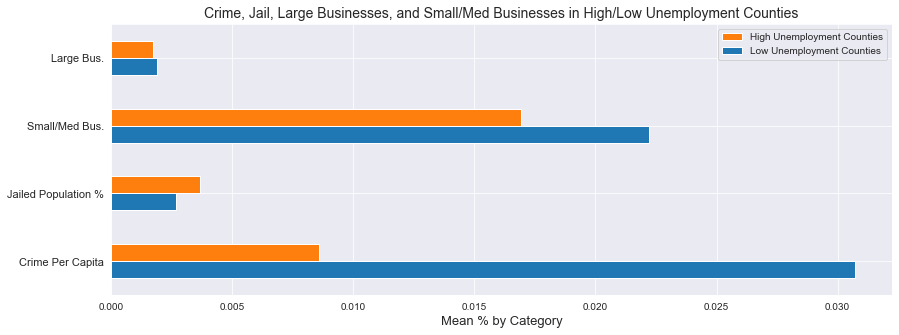

In [37]:
# Crime, Jail, Large businesses, Small/Medium Businesses in high/low unemployment counties

low_u = df[df['unemployment_rate_2010'] < df['unemployment_rate_2010'].mean()][['crime_per_capita', 'population_jail_prc',
                                                                               'per_capita_sme_num', 'per_capita_large_num']].mean()

high_u = df[df['unemployment_rate_2010'] > df['unemployment_rate_2010'].mean()][['crime_per_capita', 'population_jail_prc',
                                                                               'per_capita_sme_num', 'per_capita_large_num']].mean()

df_hl_3 = pd.concat([low_u, high_u], axis= 1)
df_hl_3.rename(columns= {0:'Low Unemployment Counties', 1: 'High Unemployment Counties'}, inplace= True)
df_hl_3.rename(index= {'crime_per_capita': 'Crime Per Capita', 'population_jail_prc': 'Jailed Population %', 
                       'per_capita_sme_num': 'Small/Med Bus.',
                       'per_capita_large_num': 'Large Bus.'}, inplace= True)

df_hl_3.plot(kind= 'barh', figsize= (14, 5), legend= 'reverse')

plt.title('Crime, Jail, Large Businesses, and Small/Med Businesses in High/Low Unemployment Counties', fontsize = 14)
plt.yticks(fontsize= 11)
plt.xlabel('Mean % by Category', fontsize = 13);

plt.savefig('../graphs/high_low3.png')

In [38]:
print('Number of small/med businesses per capita in counties with an unemployment rate of less than 5%: ',
      df[df['unemployment_rate_2010'] <= 5]['per_capita_sme_num'].mean())

print('Number of small/med businesses per capita in counties with an unemployment rate of more than 15%: ',
      df[df['unemployment_rate_2010'] >= 15]['per_capita_sme_num'].mean())

print('\n')

print('Number of large businesses per capita in counties with an unemployment rate of less than 5%: ',
      df[df['unemployment_rate_2010'] <= 5]['per_capita_large_num'].mean())

print('Number of large businesses per capita in counties with an unemployment rate of more than 15%: ',
      df[df['unemployment_rate_2010'] >= 15]['per_capita_large_num'].mean())

print('\n')

print('Number of liquor stores per 10k people in counties with an unemployment rate of less than 5%: ',
      df[df['unemployment_rate_2010'] <= 5]['liquor_stores_per10k'].mean())

print('Number of liquor stores per 10k people in counties with an unemployment rate of more than 15%: ',
      df[df['unemployment_rate_2010'] >= 15]['liquor_stores_per10k'].mean())

Number of small/med businesses per capita in counties with an unemployment rate of less than 5%:  0.029108229729097004
Number of small/med businesses per capita in counties with an unemployment rate of more than 15%:  0.014879548961240307


Number of large businesses per capita in counties with an unemployment rate of less than 5%:  0.0018564780000696773
Number of large businesses per capita in counties with an unemployment rate of more than 15%:  0.0015486361550387595


Number of liquor stores per 10k people in counties with an unemployment rate of less than 5%:  1.8054347826086954
Number of liquor stores per 10k people in counties with an unemployment rate of more than 15%:  0.7899224806201549
